In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
import Memoriser.Grids.grids as gs
import Memoriser.Transforms.gaussian as gauss
import Memoriser.DataGenerator.figures as dgf
from Memoriser.memoriser import Memo

In [48]:
D = 3
NO_DPOINTS = 100
NO_TPOINTS = 1000
gauss.D=3
gauss.update()

4.518122841170921


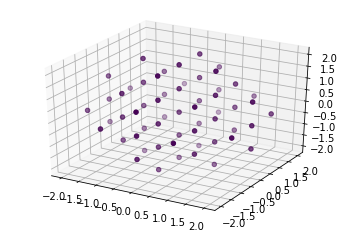

In [49]:
grid = list()
scale = gs.ball(grid, NO_DPOINTS, D=D, r=.5)
print(scale)
grid2 = gs.scale(scale, grid)
if D == 3:
    dgf.plot3D_xc(grid2, [0]*len(grid))
elif D == 2:
    dgf.plot2D_xc(grid, [0]*len(grid))

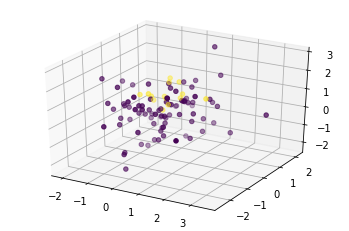

In [57]:
centers, labels, rs = dgf.normal_random_figures(NO_CENTERS=8, RADIUS_SPREAD=1., D=D,)
train_data = dgf.normal(centers, labels, rs, D=D, n=NO_DPOINTS)
test_data = dgf.normal(centers, labels, rs, D=D, n=NO_TPOINTS)
noisy_data = dgf.noise(train_data, NOISE=0.2)
X_train = [t[0] for t in train_data]
Y_train = [t[1] for t in train_data]
X_test = [t[0] for t in test_data]
Y_test = [t[1] for t in test_data]

dgf.plot3D_data(train_data)

original:  0.909
memo:  0.922


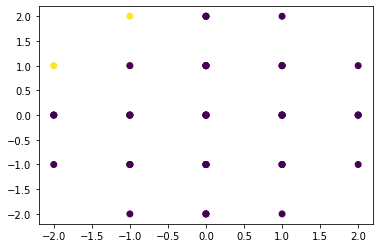

In [58]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
print("original: ", random_forest.score(X_test, Y_test))
M = Memo(T=gauss.T, Tinv=gauss.Tinv)
X_table, Y_table = M.memo(scale, grid, random_forest)
print("memo: ",M.score(X_test, Y_test))
dgf.plot2D_xc(X_table, Y_table)

3.6415888336127784


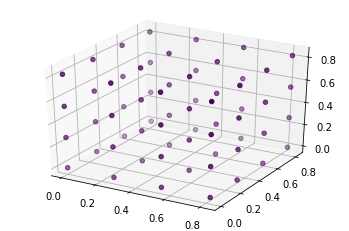

In [59]:
grid = list()
scale = gs.cube(grid, NO_DPOINTS, D=D)
print(scale)
grid2 = gs.scale(scale, grid)
if D == 3:
    dgf.plot3D_xc(grid, [0]*len(grid))
elif D == 2:
    dgf.plot2D_xc(grid, [0]*len(grid))

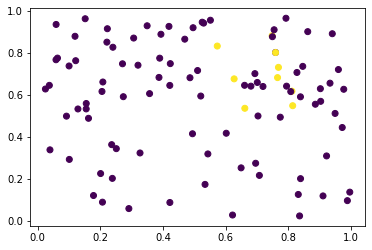

In [60]:
centers, labels, rs = dgf.uniform_random_figures(NO_CENTERS=5, D=D)
train_data = dgf.uniform(centers, labels, rs, D=D, n=NO_DPOINTS)
test_data = dgf.uniform(centers, labels, rs, D=D, n=NO_TPOINTS)
X_train = [t[0] for t in train_data]
Y_train = [t[1] for t in train_data]
X_test = [t[0] for t in test_data]
Y_test = [t[1] for t in test_data]

dgf.plot2D_data(train_data)

original:  0.972
memo:  0.97


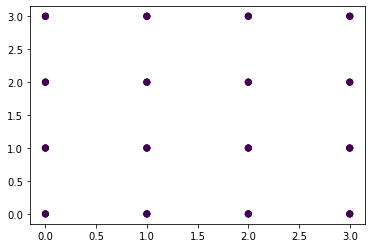

In [61]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
print("original: ", random_forest.score(X_test, Y_test))
M = Memo()
X_table, Y_table = M.memo(scale, grid, random_forest)
print("memo: ",M.score(X_test, Y_test))
dgf.plot2D_xc(X_table, Y_table)

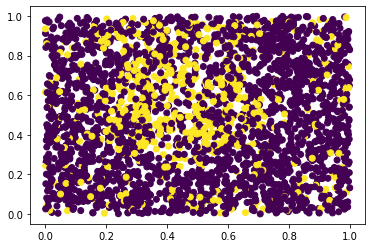

In [62]:
centers, labels, rs = dgf.uniform_random_figures(NO_CENTERS=5, D=D)
train_data = dgf.uniform(centers, labels, rs, D=D, n=3000)
test_data = dgf.uniform(centers, labels, rs, D=D)
noisy_data = dgf.noise(train_data, NOISE=0.1)
X_train = [t[0] for t in noisy_data]
Y_train = [t[1] for t in noisy_data]
X_test = [t[0] for t in test_data]
Y_test = [t[1] for t in test_data]

dgf.plot2D_data(noisy_data)

original:  0.955
memo:  0.873


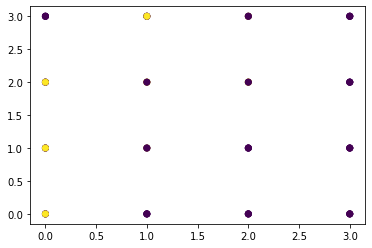

In [63]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
print("original: ", random_forest.score(X_test, Y_test))
M = Memo()
X_table, Y_table = M.memo(scale, grid, random_forest)
print("memo: ",M.score(X_test, Y_test))
dgf.plot2D_xc(X_table, Y_table)

In [64]:
print("memo: ",M.score(X_test, Y_test))

memo:  0.873


In [65]:
random_forest.score(X_test, Y_test)

0.955